In [38]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
# Need to uncomment the following line in order to download nltk stopwords:
# nltk.download('stopwords')
import re
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline
sns.set()

# Import data set:

In [2]:
pd.options.mode.chained_assignment = None

with open('data/dk_asylum_data.json', encoding='utf-8') as inputfile:
    df_full = pd.read_json(inputfile)

# Convert json to csv:
df_full.to_csv('data/dk_asylum_data.csv', encoding='utf-8', index=False)

df_full.shape

(9324, 5)

# Data preprocessing:

## Keep cases of Unknown Homeland (Ukendt hjemland):

In [3]:
df_UH = df_full[df_full.country == "Ukendt hjemland"]

# Drop redundant column:
df_UH.drop('hasText', axis=1, inplace=True)

# Keep column 'text':
df = df_UH[['text']]

df["text"] = df["text"].astype(str)

df.shape

df.head()

,text
201,Nævnet stadfæstede i november 2021 Udl...
428,Nævnet stadfæstede i juni 2021 Udlændi...
464,Nævnet stadfæstede i juni 2021 Udlændi...
901,Nævnet stadfæstede i december 2020 Udl...
1291,Nævnet hjemviste i juni 2020 Udlænding...


## Lower casing:

In [4]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede i november 2021 udl...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede i december 2020 udl...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste i juni 2020 udlænding...


## Punctuation removal:

In [5]:
PUNCTUATION_TO_REMOVE = '–«!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~»●·’“”'


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCTUATION_TO_REMOVE))


df["text_wo_punct"] = df["text_lower"].apply(
    lambda text: remove_punctuation(text))
df.head()

,text,text_lower,text_wo_punct
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede i november 2021 udl...,nævnet stadfæstede i november 2021 udl...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede i juni 2021 udlændi...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede i juni 2021 udlændi...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede i december 2020 udl...,nævnet stadfæstede i december 2020 udl...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste i juni 2020 udlænding...,nævnet hjemviste i juni 2020 udlænding...


## Stopwords removal:

In [6]:
stopwords_lower = list(map(lambda x: x.lower(), stopwords.words('danish')))

STOPWORDS_DANISH = set(stopwords_lower)

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if not word in STOPWORDS_DANISH])


df["text_wo_stop"] = df["text_wo_punct"].apply(
    lambda text: remove_stopwords(text))
df.head()

,text,text_lower,text_wo_punct,text_wo_stop
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede i november 2021 udl...,nævnet stadfæstede i november 2021 udl...,nævnet stadfæstede november 2021 udlændingesty...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede i juni 2021 udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede i december 2020 udl...,nævnet stadfæstede i december 2020 udl...,nævnet stadfæstede december 2020 udlændingesty...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste i juni 2020 udlænding...,nævnet hjemviste i juni 2020 udlænding...,nævnet hjemviste juni 2020 udlændingestyrelsen...


## Numbers removal:

In [7]:
# Drop the columns which are no longer needed
df.drop(["text_lower", 'text_wo_punct'], axis=1, inplace=True)


def drop_numbers(text):
    text_wo_numbers = re.sub(r'[0-9]+', '', text)
    return text_wo_numbers


df["text_wo_numbers"] = df["text_wo_stop"].apply(
    lambda text: drop_numbers(text))
df.head()

,text,text_wo_stop,text_wo_numbers
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede november 2021 udlændingesty...,nævnet stadfæstede november udlændingestyrels...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...,nævnet stadfæstede juni udlændingestyrelsens ...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...,nævnet stadfæstede juni udlændingestyrelsens ...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede december 2020 udlændingesty...,nævnet stadfæstede december udlændingestyrels...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste juni 2020 udlændingestyrelsen...,nævnet hjemviste juni udlændingestyrelsens af...


## Single character words removal:

In [8]:
def drop_single_letter_words(text):
    return ' '.join([w for w in text.split() if len(w) > 1])


df["text_wo_single_letters"] = df["text_wo_numbers"].apply(
    lambda text: drop_single_letter_words(text))
df.head()

,text,text_wo_stop,text_wo_numbers,text_wo_single_letters
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede november 2021 udlændingesty...,nævnet stadfæstede november udlændingestyrels...,nævnet stadfæstede november udlændingestyrelse...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...,nævnet stadfæstede juni udlændingestyrelsens ...,nævnet stadfæstede juni udlændingestyrelsens a...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni 2021 udlændingestyrels...,nævnet stadfæstede juni udlændingestyrelsens ...,nævnet stadfæstede juni udlændingestyrelsens a...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede december 2020 udlændingesty...,nævnet stadfæstede december udlændingestyrels...,nævnet stadfæstede december udlændingestyrelse...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste juni 2020 udlændingestyrelsen...,nævnet hjemviste juni udlændingestyrelsens af...,nævnet hjemviste juni udlændingestyrelsens afg...


## Tokenize text:

In [9]:
# Drop the columns which are no longer needed
df.drop(["text_wo_stop", 'text_wo_numbers'], axis=1, inplace=True)

nlp = spacy.load("da_core_news_sm")

def tokenize_text(text):
    doc = nlp.tokenizer(text)
    return ' '.join([token.text for token in doc])

df["text_tokenized"] = df["text_wo_single_letters"].apply(lambda text: tokenize_text(text))

df.head()

,text,text_wo_single_letters,text_tokenized
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede november udlændingestyrelse...,nævnet stadfæstede november udlændingestyrelse...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni udlændingestyrelsens a...,nævnet stadfæstede juni udlændingestyrelsens a...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni udlændingestyrelsens a...,nævnet stadfæstede juni udlændingestyrelsens a...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede december udlændingestyrelse...,nævnet stadfæstede december udlændingestyrelse...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste juni udlændingestyrelsens afg...,nævnet hjemviste juni udlændingestyrelsens afg...


## Lemmatization:

In [10]:
def lemmatize_words(text):
    """custom function to lemmatize text"""
    doc = nlp(text)
    # pos_tagged_text = text.pos
    return ' '.join([token.lemma_ for token in doc])


df["text_lemmatized"] = df["text_tokenized"].apply(
    lambda text: lemmatize_words(text))
df.head()

,text,text_wo_single_letters,text_tokenized,text_lemmatized
201,Nævnet stadfæstede i november 2021 Udl...,nævnet stadfæstede november udlændingestyrelse...,nævnet stadfæstede november udlændingestyrelse...,nævn stadfæste november udlændingestyrelse afg...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni udlændingestyrelsens a...,nævnet stadfæstede juni udlændingestyrelsens a...,nævn stadfæste juni udlændingestyrelse afgørel...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævnet stadfæstede juni udlændingestyrelsens a...,nævnet stadfæstede juni udlændingestyrelsens a...,nævn stadfæste juni udlændingestyrelse afgørel...
901,Nævnet stadfæstede i december 2020 Udl...,nævnet stadfæstede december udlændingestyrelse...,nævnet stadfæstede december udlændingestyrelse...,nævn stadfæste december udlændingestyrelse afg...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævnet hjemviste juni udlændingestyrelsens afg...,nævnet hjemviste juni udlændingestyrelsens afg...,nævn hjemviste juni udlændingestyrelse afgørel...


## No-sense words removal:

In [19]:
# df.drop(["text_wo_single_letters", 'text_tokenized'], axis=1, inplace=True)

# Using spacy’s pos_ attribute, we can check if a particular token 
# is junk (i.e do not mean anything) through token.pos_ == 'X' and remove them.

def remove_junk(text):
    # Creating a spacy object
    doc=nlp(text)
    # Checking if POS tag is X and printing them
    for token in doc:
        if token.pos_=='X':
            print(token.text)
    # Removing the tokens whose POS tag is junk.
    clean_doc=[token.text for token in doc if not token.pos_=='X']
    
    return ' '.join(clean_doc)



df['no_junk'] = df["text_lemmatized"].apply(lambda text: remove_junk(text))

df.head()

oplyse
måned
hjælpe
holland
måned
tale
tag
frigive
følge
påberåbe
sprogtests
in
birth
påberåbe
tilknytte
bevisførelse
ortodoks
oplyse
gengive
statsborgerskab
fremlægge
udstede
måned
bopæl
afgive
række
hense
hense
mobiltelefon
tag
virke
hense
as
most
frieri
måned
bopæl
afgive
række
hense
hense
mobiltelefon
tag
virke
hense
oplyse
oplyse
hense
bo
begrænse
rohingya
familie
foto
udstede
specimen
foto
genindkalde
passe
afgive
afgive
sammenholde
tag
hjemlandhjemyars
as
es
læg
føde
måned
es
læg
oplyse
måned
es
læg
anholde
måned
es
es
læg
angribe
tag
oplyse
føde
fremgå
udlændingelov
følge
gø
oplyse
bo
whatsapp
gø
afgive
tag
tie
måned
halv
afgøre
udstede
læg
bopæl
trække
oplyse
kl
følge
udlændingelov
udlænding
møde
tag
påberåbe
følge
udlændingelov
møde
tag
tag
hense
læg
påberåbe
hense
følge
overdrage
tag
hjemmeside
politirapport
tidlig
oplyse
politirapport
land
politirapport
medlem
oplyse
isil
kl
kl
nævnsmøde
oplyse
følge
oplyse
slave
detaljeringsgrad
asylkort
nævnsmøde
udlændingelov
afslag
afgi

,text,text_lemmatized,no_junk
201,Nævnet stadfæstede i november 2021 Udl...,nævn stadfæste november udlændingestyrelse afg...,nævn stadfæste november udlændingestyrelse afg...
428,Nævnet stadfæstede i juni 2021 Udlændi...,nævn stadfæste juni udlændingestyrelse afgørel...,nævn stadfæste juni udlændingestyrelse afgørel...
464,Nævnet stadfæstede i juni 2021 Udlændi...,nævn stadfæste juni udlændingestyrelse afgørel...,nævn stadfæste juni udlændingestyrelse afgørel...
901,Nævnet stadfæstede i december 2020 Udl...,nævn stadfæste december udlændingestyrelse afg...,nævn stadfæste december udlændingestyrelse afg...
1291,Nævnet hjemviste i juni 2020 Udlænding...,nævn hjemviste juni udlændingestyrelse afgørel...,nævn hjemviste juni udlændingestyrelse afgørel...


# Analysis:

## N-gram analysis:

In [20]:
def generate_N_grams(text, ngram=1):
    """"custom function to generate n-grams"""
    words = [word for word in text.split(
        " ") if word not in set(STOPWORDS_DANISH)]
    # print("Sentence after removing stopwords:", words)
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

values = defaultdict(int)

# Get the count of every bigram in the data set from last processed column:
for text in df['no_junk']:
    for word in generate_N_grams(text, 2):
        values[word] += 1


In [29]:
# Focus on more frequently occuring words.
# Sort in descending order with respect to the column of interest:
df_processed = pd.DataFrame(sorted(values.items(), key=lambda x: x[1], reverse=True))

# Ten first values of the first column:
c1 = df_processed[0][:10]
# Ten first values of the second column:
c2 = df_processed[1][:10]

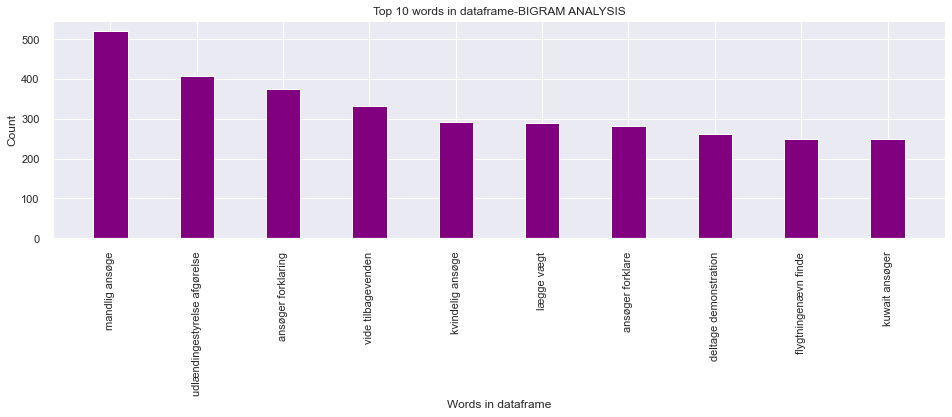

In [30]:
plt.figure(1, figsize=(16, 4))
plt.bar(c1, c2, color='purple',
        width=0.4)
plt.xlabel("Words in dataframe")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-BIGRAM ANALYSIS")
# plt.savefig("dataset-bigram.png")
plt.show()

## TF-IDF

In [36]:
# Get the column of interest: 
docs=df['no_junk'].tolist()

# Create a vocabulary of words, ignore words that appear in 85% of documents, 
# Eliminate stop words if any:
cv=CountVectorizer(max_df=0.85,stop_words=STOPWORDS_DANISH)
word_count_vector=cv.fit_transform(docs)

# Get shape of resulting vector:
word_count_vector.shape

(192, 3370)

In [37]:
word_count_vector = cv.fit_transform(docs)

# Look at 10 words from our vocabulary:
list(cv.vocabulary_.keys())[:10]

['november',
 'mandlig',
 'statsborger',
 'ukendt',
 'hjemland',
 'udtalteflygtningenævnet',
 'foreligge',
 'oplysning',
 'fund',
 'udeblivelse']

In [39]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# Look at the IDF values:
tfidf_transformer.idf_

array([5.1640779 , 5.56954301, 5.1640779 , ..., 3.77778354, 4.65325228,
       5.56954301])

In [40]:
# Sorts the values in the vector while preserving the column index
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(fname)

    # Create a tuples of feature,score
    # results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [47]:
# We only need to do this once:
feature_names=cv.get_feature_names_out()

# Generate tf-idf for all documents in list. docs has 192 documents
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    
    results.append(keywords)

df_tfIDF=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
# df_tfIDF.shape
df_tfIDF

,doc,keywords
0,nævn stadfæste november udlændingestyrelse afg...,"{'myanmar': 0.433, 'rohingya': 0.324, 'lejr': ..."
1,nævn stadfæste juni udlændingestyrelse afgørel...,"{'algeriet': 0.555, 'gidsel': 0.285, 'frankrig..."
2,nævn stadfæste juni udlændingestyrelse afgørel...,"{'sudan': 0.33, 'sydsudan': 0.232, 'bla': 0.16..."
3,nævn stadfæste december udlændingestyrelse afg...,"{'somalia': 0.475, 'alshabaab': 0.457, 'kenya'..."
4,nævn hjemviste juni udlændingestyrelse afgørel...,"{'eritreisk': 0.382, 'eritrea': 0.371, 'etiopi..."
...,...,...
187,nævn stadfæste februar udlændingestyrelse afgø...,"{'fader': 0.403, 'liyu': 0.372, 'police': 0.31..."
188,nævn stadfæste juli udlændingestyrelse afgørel...,"{'onlf': 0.404, 'police': 0.336, 'liyu': 0.336..."
189,nævn hjemviste juli udlændingestyrelse afgørel...,"{'bør': 0.492, 'foretage': 0.179, 'etiopien': ..."
190,nævn stadfæste maj udlændingestyrelse afgørels...,"{'soldat': 0.552, 'hytte': 0.24, 'burmesiske':..."
